#**Model Based Reflex Agent**

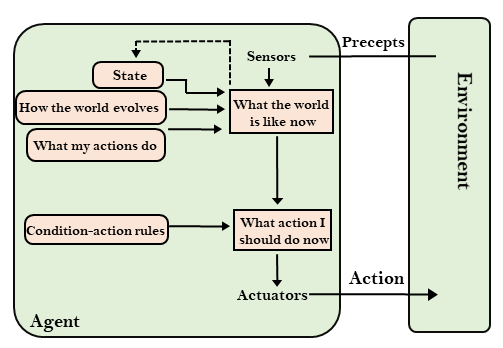

#Model Based Agent Code Example #1 (Vacuum Cleaner)

In [ ]:
l=[9.9,99]
d={'name':'mehak'}
d.

In [ ]:
class ModelBasedAgent:
    def __init__(self):
        self.model = {}

    def update_model(self, percept):
        self.model['current'] = percept
        print(self.model)


    def predict_action(self):
        if self.model['current'] == 'Dirty':
            return 'Clean the room'
        else:
            return 'Room is clean'

    def act(self, percept):
        self.update_model(percept)
        return self.predict_action()


class Environment:
    def __init__(self, state='Dirty'):
        self.state = state

    def get_percept(self):
        return self.state

    def clean_room(self):
        self.state = 'Clean'


def run_agent(agent, environment, steps):
    for step in range(steps):
        percept = environment.get_percept()
        action = agent.act(percept)
        print(f"Step {step + 1}: Percept - {percept}, Action - {action}")
        if percept == 'Dirty':
            environment.clean_room()


# Create instances of agent and environment
agent = ModelBasedAgent()
environment = Environment()

# Run the agent in the environment for 5 steps
run_agent(agent, environment, 5)


{'current': 'Dirty'}
Step 1: Percept - Dirty, Action - Clean the room
{'current': 'Clean'}
Step 2: Percept - Clean, Action - Room is clean
{'current': 'Clean'}
Step 3: Percept - Clean, Action - Room is clean
{'current': 'Clean'}
Step 4: Percept - Clean, Action - Room is clean
{'current': 'Clean'}
Step 5: Percept - Clean, Action - Room is clean


#Example 3 Simple Reflex Agent Code Example #3 (2D Grid-Based Vacuum Cleaner Simulation: Smart Cleaning Robot (Model Baed))

In [ ]:
class SimpleReflexAgent:
    def __init__(self):
        self.position = 0  # Start at position 0 (top-left corner)
        self.environment_model = ['Clean', 'Dirty', 'Clean',
                                  'Clean', 'Dirty', 'Dirty',
                                  'Clean', 'Clean', 'Clean']  # Initial model of the environment

    def act(self, percept):
        # If the current position is dirty, clean it
        if percept == 'Dirty':
            self.environment_model[self.position] = 'Clean'  # Clean the environment model
            return 'Clean the room'
        else:
            return 'Room is clean'

    def move(self):
        # Move to the next position in the grid
        if self.position < 8:
            self.position += 1
        return self.position

    def update_model(self, position, percept):
        # Update the agent's internal model with the percept
        self.environment_model[position] = percept

    def get_model(self):
        return self.environment_model


class Environment:
    def __init__(self):
        # Create the environment with a 3x3 grid, where 'b', 'e', and 'f' are dirty
        self.grid = ['Clean', 'Dirty', 'Clean',
                     'Clean', 'Dirty', 'Dirty',
                     'Clean', 'Clean', 'Clean']

    def get_percept(self, position):
        # Return the state of the current position
        return self.grid[position]

    def clean_room(self, position):
        # Clean the room at the given position
        self.grid[position] = 'Clean'

    def display_grid(self, agent_position):
        # Display the current state of the grid in a 3x3 format
        print("\nCurrent Grid State:")
        grid_with_agent = self.grid[:]  # Copy the grid
        grid_with_agent[agent_position] = "👽"  # Place the agent at the current position
        for i in range(0, 9, 3):
            print(" | ".join(grid_with_agent[i:i + 3]))
        print()  # Extra line for spacing


def run_agent(agent, environment, steps):
    for step in range(steps):
        percept = environment.get_percept(agent.position)
        action = agent.act(percept)
        print(f"Step {step + 1}: Position {agent.position} -> Percept - {percept}, Action - {action}")

        # Update agent's internal model based on percept
        agent.update_model(agent.position, percept)

        # Display the grid state with agent's position
        environment.display_grid(agent.position)

        if percept == 'Dirty':
            environment.clean_room(agent.position)

        agent.move()


# Create instances of agent and environment
agent = SimpleReflexAgent()
environment = Environment()

# Run the agent in the environment for 9 steps (to cover the 3x3 grid)
run_agent(agent, environment, 9)


Step 1: Position 0 -> Percept - Clean, Action - Room is clean

Current Grid State:
👽 | Dirty | Clean
Clean | Dirty | Dirty
Clean | Clean | Clean

Step 2: Position 1 -> Percept - Dirty, Action - Clean the room

Current Grid State:
Clean | 👽 | Clean
Clean | Dirty | Dirty
Clean | Clean | Clean

Step 3: Position 2 -> Percept - Clean, Action - Room is clean

Current Grid State:
Clean | Clean | 👽
Clean | Dirty | Dirty
Clean | Clean | Clean

Step 4: Position 3 -> Percept - Clean, Action - Room is clean

Current Grid State:
Clean | Clean | Clean
👽 | Dirty | Dirty
Clean | Clean | Clean

Step 5: Position 4 -> Percept - Dirty, Action - Clean the room

Current Grid State:
Clean | Clean | Clean
Clean | 👽 | Dirty
Clean | Clean | Clean

Step 6: Position 5 -> Percept - Dirty, Action - Clean the room

Current Grid State:
Clean | Clean | Clean
Clean | Clean | 👽
Clean | Clean | Clean

Step 7: Position 6 -> Percept - Clean, Action - Room is clean

Current Grid State:
Clean | Clean | Clean
Clean | Clean | 

#3.2.2 Model Based Agent Code Example #2 (Closing Window When it Starts to Rain)

In [ ]:
class Environment:
    def __init__(self, rain='No', windows_open='Open'):
        self.rain = rain
        self.windows_open = windows_open

    def get_percept(self):
        """Returns the current percept (rain status and window status)."""
        return {'rain': self.rain, 'windows_open': self.windows_open}

    def close_windows(self):
        """Closes the windows if they are open."""
        if self.windows_open == 'Open':
            self.windows_open = 'Closed'


class ModelBasedAgent:
    def __init__(self):
        self.model = {'rain': 'No', 'windows_open': 'Open'}

    def act(self, percept):
        """Decides action based on the model and current percept."""
        # Update the model with the current percept
        self.model.update(percept)

        # Check the model to decide action
        if self.model['rain'] == 'Yes' and self.model['windows_open'] == 'Open':
            return 'Close the windows'
        else:
            return 'No action needed'

def run_agent(agent, environment, steps):
    for step in range(steps):
        # Get the current percept from the environment
        percept = environment.get_percept()

        # Agent makes a decision based on the current percept
        action = agent.act(percept)

        # Print the current percept and the agent's action
        print(f"Step {step + 1}: Percept - {percept}, Action - {action}")

        # If the agent decided to close the windows, update the environment
        if action == 'Close the windows':
            environment.close_windows()

# Create instances of agent and environment
agent = ModelBasedAgent()
environment = Environment(rain='Yes', windows_open='Open')  # It's raining and windows are open

# Run the agent in the environment for 5 steps
run_agent(agent, environment, 5)


Step 1: Percept - {'rain': 'Yes', 'windows_open': 'Open'}, Action - Close the windows
Step 2: Percept - {'rain': 'Yes', 'windows_open': 'Closed'}, Action - No action needed
Step 3: Percept - {'rain': 'Yes', 'windows_open': 'Closed'}, Action - No action needed
Step 4: Percept - {'rain': 'Yes', 'windows_open': 'Closed'}, Action - No action needed
Step 5: Percept - {'rain': 'Yes', 'windows_open': 'Closed'}, Action - No action needed
